In [14]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from random import shuffle

from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
sns.set()
%matplotlib inline

In [82]:
LAYER_INDEX = -3
IMAGES_SIZE = slice(0,500)

In [16]:
model = keras.models.load_model('mnist.h5')

In [17]:
(x_train, y_train), _ = mnist.load_data()

In [18]:
inp = model.input
dense = model.layers[LAYER_INDEX]

In [19]:
func = keras.backend.function([inp], [dense.output])

In [20]:
data = list(zip(x_train,y_train))
shuffle(data)
x_train, y_train = zip(*data)

In [21]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [83]:
X = [x_train[IMAGES_SIZE].reshape(-1,28,28,1)]
y = y_train[IMAGES_SIZE]

In [84]:
embedding = func(X)[0]

In [85]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(embedding)

print(f"explained variance {pca.explained_variance_ratio_.sum()}")

pca_cpt1, pca_cpt2 = zip(*X_pca)

explained variance 0.34534144401550293


In [86]:
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(embedding)

tsne_cpt1, tsne_cpt2 = zip(*X_tsne)

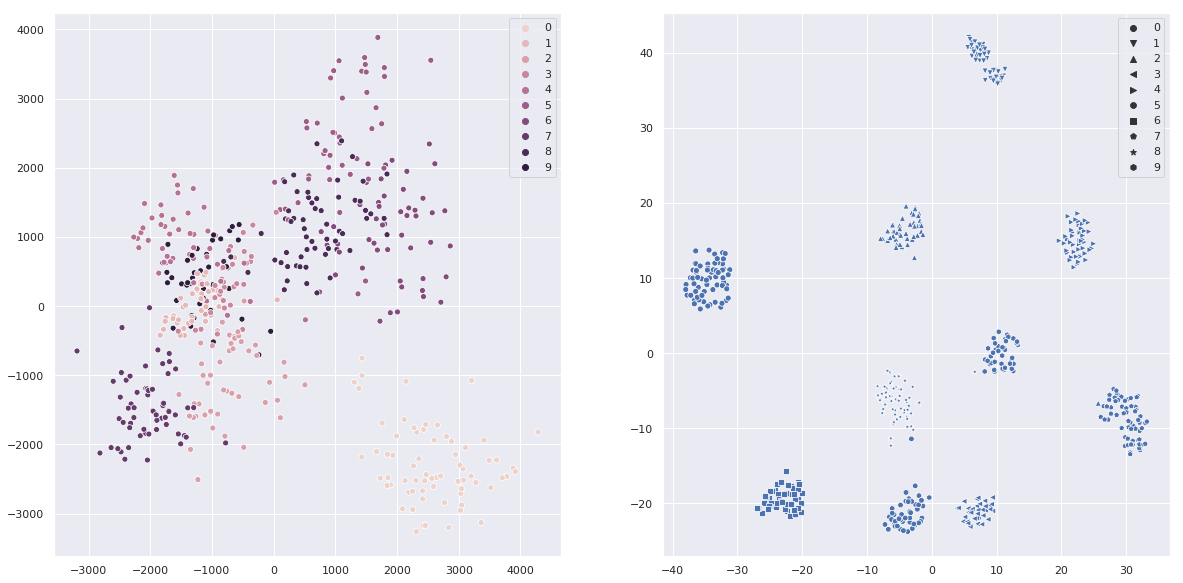

In [87]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(pca_cpt1, pca_cpt2, hue=y,legend="full", ax=ax1)
sns.scatterplot(tsne_cpt1, tsne_cpt2,legend="full", ax=ax2, style=y, markers=filled_markers)

In [91]:
from matplotlib import offsetbox
def plot_embedding(X):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
        # only print thumbnails with matplotlib > 1.0
    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 1e-3:
                # don't show points that are too close
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(x_train[i], cmap=plt.cm.gray_r), X[i])
        ax.add_artist(imagebox)


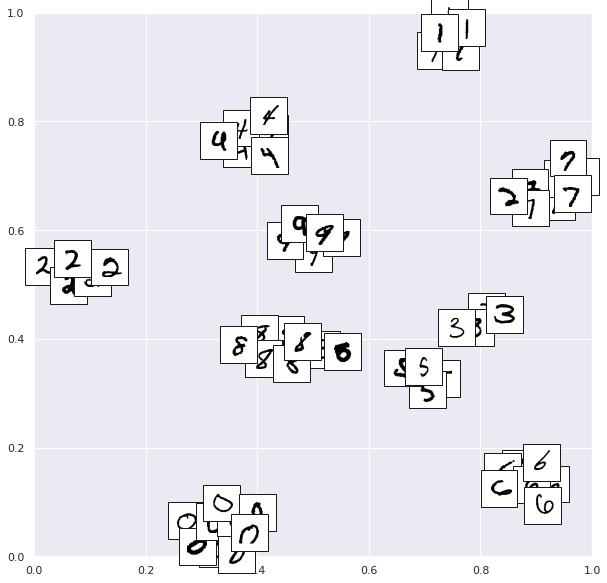

In [92]:
plot_embedding(tsne.fit_transform(embedding))